In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("chicago_house_price.csv")
df.columns = [col.replace(' ', '_') for col in df.columns]
df

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


In [4]:
df.isnull().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [5]:
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]
cols_with_missing 

['Price',
 'Bedroom',
 'Space',
 'Room',
 'Lot',
 'Tax',
 'Bathroom',
 'Garage',
 'Condition']

In [6]:
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

     Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
6     49.0      5.0  1400.0   8.0   NaN   678.0       1.0     1.0        1.0
8     72.0      4.0  1290.0   8.0   NaN   800.0       1.5     1.5        0.0
17    64.0      4.0  1226.0   8.0  37.0     NaN       2.0     2.0        0.0
21    43.0      3.0   596.0   5.0  50.0     NaN       1.0     0.0        0.0
32    49.0      4.0  1408.0   8.0   NaN   650.0       1.0     1.0        1.0
49    45.0      2.0     NaN   4.0  30.0   470.0       2.0     1.0        0.0
52    50.0      2.0     NaN   5.0  39.0   687.0       1.5     0.0        0.0
56    65.0      2.0  1145.0   7.0  50.0     NaN       1.5     1.5        0.0
68    65.0      2.0     NaN   7.0  30.0   719.0       2.0     0.0        1.0
73    44.0      3.0   579.0   5.0   NaN   753.0       1.0     0.0        0.0
75    43.0      2.0     NaN   4.0  30.0   425.0       2.0     1.0        0.0
79    52.0      2.0   855.0   5.0  33.0     NaN       1.0     2.0        1.0

In [7]:
# delete row 156
df_copy = df.copy()
df_copy= df.drop(156)
df_copy

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0


In [8]:
df_copy.isnull().sum()

Price         0
Bedroom       0
Space        10
Room          0
Lot          10
Tax           9
Bathroom      0
Garage        0
Condition     0
dtype: int64

In [9]:
cols_with_missing = [col for col in df_copy.columns
                     if df_copy[col].isnull().any()]
cols_with_missing 

['Space', 'Lot', 'Tax']

In [10]:
df_copy.isnull().sum()

Price         0
Bedroom       0
Space        10
Room          0
Lot          10
Tax           9
Bathroom      0
Garage        0
Condition     0
dtype: int64

In [12]:
# Impute missing values  with the mean of column 'A'
mean_df = df_copy['Tax'].mean()
print(mean_df)
df_copy['Tax'] = df_copy['Tax'].fillna(mean_df)
df_copy.isnull().sum()

911.7074829931972


Price         0
Bedroom       0
Space        10
Room          0
Lot          10
Tax           0
Bathroom      0
Garage        0
Condition     0
dtype: int64

In [13]:
# Impute missing values  with the mean of column 'A'
mode_df = df_copy['Lot'].mode()[0]
print(mode_df)
df_copy['Lot'] = df_copy['Lot'].fillna(mode_df)
df_copy.isnull().sum()

25.0


Price         0
Bedroom       0
Space        10
Room          0
Lot           0
Tax           0
Bathroom      0
Garage        0
Condition     0
dtype: int64

In [14]:
median_df = df_copy['Space'].median()
print(median_df)
df_copy['Space'] = df_copy['Space'].fillna(median_df)
df_copy.isnull().sum()

965.5


Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      156 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        156 non-null    float64
 5   Tax        156 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.1 KB


In [16]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,156.0,56.474359,12.875307,32.0,46.00,55.0,65.0,90.0
Bedroom,156.0,3.166667,1.348037,1.0,2.00,3.0,4.0,8.0
Space,156.0,1088.801282,448.541078,539.0,818.75,965.5,1183.0,2295.0
Room,156.0,6.500000,1.675247,4.0,5.00,6.0,7.0,12.0
Lot,156.0,32.307692,8.402469,24.0,25.00,30.0,35.5,50.0
Tax,156.0,911.707483,430.202056,418.0,674.25,845.5,986.5,2752.0
Bathroom,156.0,1.480769,0.529408,1.0,1.00,1.5,2.0,3.0
Garage,156.0,0.846154,0.808454,0.0,0.00,1.0,1.5,2.0
Condition,156.0,0.230769,0.422682,0.0,0.00,0.0,0.0,1.0


<Axes: >

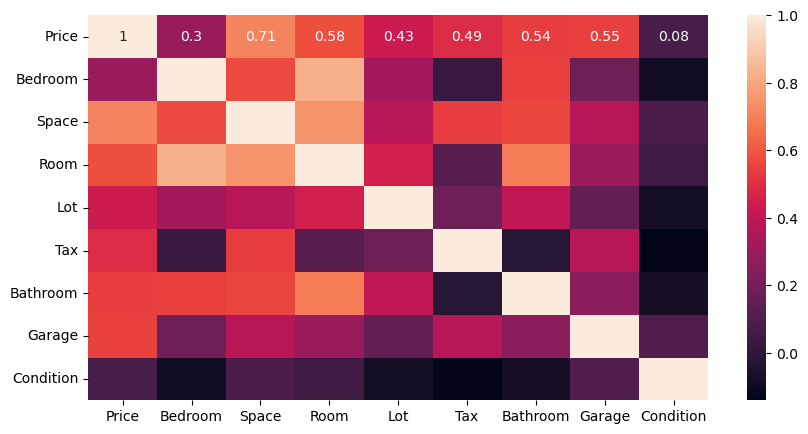

In [17]:
corr = df_copy.corr().round(2)
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True )

In [18]:
df_copy.columns

Index(['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage',
       'Condition'],
      dtype='object')

In [19]:
cols_need = ['Room', 'Space', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Bedroom']
x = df_copy[cols_need]
x

,Room,Space,Lot,Tax,Bathroom,Garage,Bedroom
0,5.0,967.0,39.0,652.000000,1.5,0.0,2.0
1,5.0,815.0,33.0,1000.000000,1.0,2.0,2.0
2,5.0,900.0,35.0,897.000000,1.5,1.0,3.0
3,6.0,1007.0,24.0,964.000000,1.5,2.0,3.0
4,7.0,1100.0,50.0,1099.000000,1.5,1.5,3.0
...,...,...,...,...,...,...,...
151,5.0,585.0,50.0,713.000000,1.0,0.0,3.0
152,5.0,820.0,27.0,911.707483,1.0,0.0,3.0
153,4.0,593.0,30.0,465.000000,2.0,1.0,2.0
154,6.0,716.0,30.0,585.000000,1.0,2.0,3.0


In [20]:
y = df_copy.Price
y

0      53.0
1      55.0
2      56.0
3      58.0
4      64.0
       ... 
151    42.0
152    44.0
153    43.0
154    53.0
155    62.0
Name: Price, Length: 156, dtype: float64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                               y,
                                               test_size = 0.3)

In [22]:
xgb_with_lr = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_with_lr.fit(x_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(x_test, y_test)],
             verbose=False)
xgb_with_lr.score(x_train, y_train)

0.9985314063551899

In [23]:
xgb_with_njobs = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_with_njobs.fit(x_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(x_test, y_test)],
             verbose=False)
xgb_with_njobs.score(x_train, y_train)

0.9985314063551899